In [121]:
# importing stuff

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Task 1 - Some basic matrix vector operations

In python we usually use numpy to do linear algebra. It is a package with a lot of functionality and fast implementation. Matrices are represented as numpy arrays. We are now going to take some matrices, implement them as numpy arrays and play around with them.

1a) Take the matrix bellow and write it as a numpy array. Try transposing it. Try inverting it. What is the determinant of A? Numpy has implementations for all of these operations

$\mathbf{A} = \begin{bmatrix} 
    2 & 1 & 2 \\ 
    -2 & 2 & -1 \\ 
    4 & 1 & 2 
\end{bmatrix}
$

1b) Implement the vector **b** = [4,1,-3]. Try transforming it with the matrix. Watch out how you do matrix multiplication in numpy. We do NOT use the * operator. This will perform element wise multiplication. We wish to rather use the @ operator, which performs matrix multiplication. The alternative is using the command matmul from numpy's linalg package.


1c) Solve the system of equations Ax = b. That is, if the A you implemented was the transformation and b is where x ended up, where did x start off? Is there a better way of doing this than inverting the matrix (checkout the np.linalg.solve function)? What is the determinant of the inverted matrix? Does the determinant of the inverse make sense, considering what the determinant of A was?

In [122]:
## Example of how to do a 2x2 matrix and a 2x2 vector

A = np.array([[1,2], [3,4]])

b = np.array([1,3])

In [123]:
#TASK 1 LF

A = np.array([[2,1,2], [-2,2,-1], [4,1,2]])
b = np.array([4,1,-3])

print(f"The determinant is: {np.linalg.det(A)}")
print(f"The transpose is: {A.T}")

A_inv = np.linalg.inv(A)

print("Transforming b:")

print(A @ b)

print("Solving for x:")

x = A_inv @ b
print(x)

print("Alternative way of solving for x:")

print(np.linalg.solve(A, b))

print("transforming the solution: ")
print(A @ x)

The determinant is: -10.000000000000002
The transpose is: [[ 2 -2  4]
 [ 1  2  1]
 [ 2 -1  2]]
Transforming b:
[ 3 -3 11]
Solving for x:
[-3.5 -0.2  5.6]
Alternative way of solving for x:
[-3.5 -0.2  5.6]
transforming the solution: 
[ 4.  1. -3.]


# Task 2 - Thrust Allocation

### Attention! Warning! Danger !!!

The solar system is invaded by the cybernetic ... robot army from ... outer space ... or something. You are a control engineer aboard the HMS Beluga, the only line of defence the earth has left. The evil invades are speeding past the Kuiper Belt and have fired a few projectiles your way. Thankfully you have an amazing Perception team aboard Beluga who has detected and tracked the rockets. The controller has even given you the desired generalized force needed to dodge the attack. But wait! Thrust needs to be allocated before the command can be performed and you just now remember that it was your responsibility, but you have procrastinated the job. Quick! The estimated time of impact is 5 minutes (if you trust your Perception group, which you don't). You have to implement the thruster matrix and solve the thrust allocation problem, in order to obtain the thruster command needed to dodge the attack.

$\tau_{desired} = [0, 100, 70, 0, 69, 5]$

2a) Implement the thruster allocation matrix of Beluga as a numpy array. You can find it in the vortexntnu github, in the auv repo under config/robots/beluga.yaml https://github.com/vortexntnu/vortex-auv


2b) Perform the thrust allocation. Assume K is the 8x8 identity (there is a function for implementing the identity directly in numpy, google it!), that is we are assuming our input is directly in force units. Use numpy's implementation of the pseudoinverse to solve for u.

2c) Thankfully you dodged the projectile, and your thrust allocation will take care of future danger. This means you have time to reflect on what you just did and learn some stuff! The desired generalized force vector, what sort of maneuver will it perform? The obtained solution, which thrusters does it use and does this make sense for the maneuver performed? Discuss these with your collegues.


In [124]:
T = np.array(      [[ 0.70711,  0.00000,  0.00000,  0.70711,  0.70711,  0.00000,  0.00000, 0.70711], # Surge
       [0.70711,  0.00000,  0.00000,  -0.70711, 0.70711,  0.00000,  0.00000, -0.70711], # Sway
       [ 0.00000,  1.00000,  1.00000,  0.00000,  0.00000,  1.00000,  1.00000, 0.00000], # Heave

       [ 0.00000, -0.20600, -0.20600,  0.00000,  0.00000, 0.20600,  0.20600,  0.00000 ], # Roll
       [ 0.00000, -0.09600,  0.09600,  0.00000,  0.00000, 0.09600, -0.09600,  0.00000 ], # Pitch 
       [0.30000, 0.00000,  0.00000,  0.30000,  -0.30000,  0.00000,  0.00000, -0.30000 ]] # Yaw
)

K = np.eye(8)

B = T @ K

tau_desired = [0, 100, 70, 0, 69, 5]

u = np.linalg.pinv(B) @ tau_desired


print("The input for dodging the attack:")
print(u)

The input for dodging the attack:
[  39.52184479 -162.1875      197.1875      -31.18851145   31.18851145
  197.1875     -162.1875      -39.52184479]


# Task 3 - The SVD

Here we will use the SVD in a Computer Vision context. We will represent a picture in a reduced rank manner, that is we will truncate the SVD.

3a) Load the image lena_dot_jpeg from the data folder. This can be done via the matplotlib library, checkout its docummentation. Display the image with the display_image function. Print the shape of the numpy array representing the image with the command np.shape 

3b) Implement the function convert_to_grayscale, which converts the image to grayscale by taking the average of the channels. Display the resulting grayscale image

3c) Take the SVD of the grayscale image. Check out the docummentation of numpy's implementation to see exactly what you get out. Check out the dimensions of the $U$, $\Sigma$ and $V^T$ matrices

3d) Truncate the SVD to the r-th rank, and checkout how the image looks. How many singular vectors do you need in order to get the image reconstructed nicely?

3e) Call the plot_explained_var function on the grayscale image, which will visualize the explained variance as a function of truncation order. How does this fit with your discussion from the last task?

The SVD can be used for extreme denoising of an image. Since it provides a hierarchy of modes, ranked after their importance in explaining the variance in the data, the last few singular vectors/values will contain only noise. Thus, the lower the truncation order, the more noise gets cut out. However at some point we will start cutting out structure as well. We will now investigate what happens to a noisy image as we try to reconstruct it with different order of SVD truncation.

3f) Load the digits dataset and add noise to it. Display both versions. This is already done in a cell bellow, just run it. Notice how noisy the digits got. Try approximating the dataset with a truncated SVD. What happens to the noise? Can you go too low (cut out too much structure)? Discuss your finding with your collegues

In [125]:
# Functions 
# Implement functions here

def convert_to_grayscale(img):
    """
    Takes an image img which is a NxMx3 numpy array, and averages out the channels such that one gets a grayscale image.
    """

    img_gray = np.average(img, 2) # TODO

    return img_gray
    

def display_img(img):
    """
    Displays the image automatically as grayscale or rgb depending on what image you pass in
    """
    if len(np.shape(img)) == 2:
        plt.imshow(img, cmap="gray")
        plt.show()
    else:
        plt.imshow(img)
        plt.show()

def plot_explained_var(X):
    """
    Performs SVD on the data matrix X and plots the explained variance as a function of the truncation order

    Consider that our image is an NxM matrix. This means that we can interpret it as N M-dimensional samples
    """
    n_samples = np.shape(X)[0]

    U, S, VT = np.linalg.svd(X) # TODO: perform SVD

    explained_var = (S ** 2) / (n_samples - 1)
    total_var = explained_var.sum()
    explained_var_ratio = explained_var / total_var # TODO: Take the ratio between the explained and total variance

    cum_var = np.cumsum(explained_var_ratio) # TODO: compute the comulative variance
    r = np.linspace(1,len(S),len(S))

    plt.plot(r, cum_var)
    plt.grid()
    plt.xlabel("Truncation Order")
    plt.ylabel("Cumulative Explained Variance")

def plot_digits(data):
    fig, axes = plt.subplots(
        4, 10, figsize=(10, 4),
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.1, wspace=0.1)
    )

    for i, ax in enumerate(axes.flat):
        ax.imshow(
            data[i].reshape(8, 8),
            cmap='binary', interpolation='nearest', clim=(0, 16)
        )

(1960, 1960, 3)


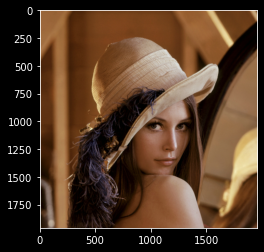

In [126]:
# 3a) load and display the image

img = plt.imread("../data/lena_dot_jpeg.jpg")


print(np.shape(img))

display_img(img)

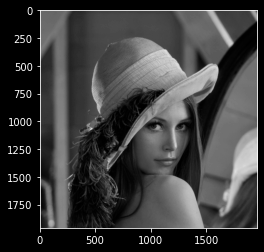

In [127]:
# 3b) Convert the image to grayscale by implementng the convert_to_grayscale function. Display the grayscale image

img_gray = convert_to_grayscale(img)


if len(np.shape(img_gray)) == 2:
        plt.imshow(img_gray, cmap="gray")
        plt.show()

In [128]:
# 3c) perform svd, checkout the SVD docummentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
# what values do you get out of the SVD?

U, S, VT = np.linalg.svd(img_gray, full_matrices=False)

print(np.shape(U))

print(np.shape(S))

print(np.shape(VT))


print(S[0])
print(S[-1])

(1960, 1960)
(1960,)
(1960, 1960)
164788.70753804932
4.925350044302538e-05


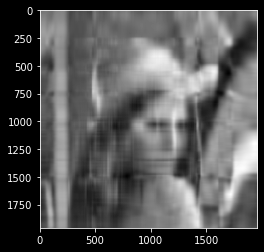

In [129]:
# 3d) approximate the matrix (image) by a rank r SVD truncation. That is, reconstruct it using the first r singular vectors and values

r = 10

Sigma = np.diag(S)

img_approx = U[:, :r] @ Sigma[:r, :r] @ VT[:r, :]

display_img(img_approx)

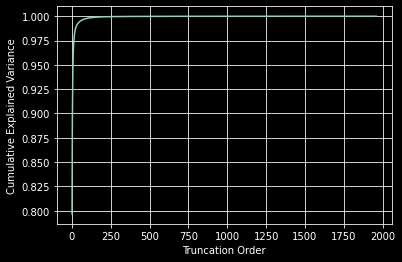

In [130]:
# 3e) do the explained variance plot of the greyscale image

plot_explained_var(img_gray)

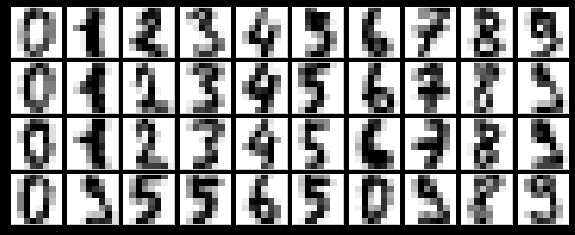

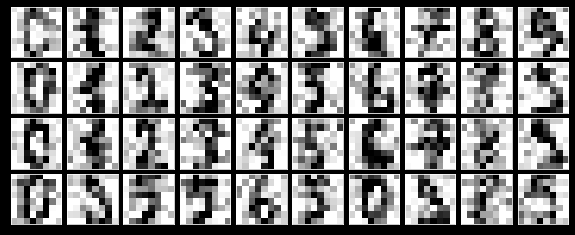

In [131]:
# Load the data for task 3f)
digits = load_digits()

X = digits.data

plot_digits(X)

np.random.seed(42)
noisy_digits = np.random.normal(X, 4)

plot_digits(noisy_digits)

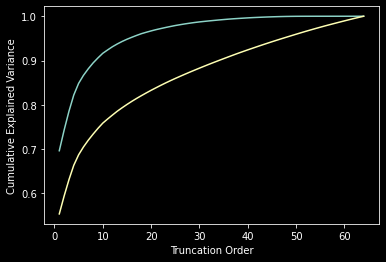

In [132]:
plot_explained_var(X)
plot_explained_var(noisy_digits)

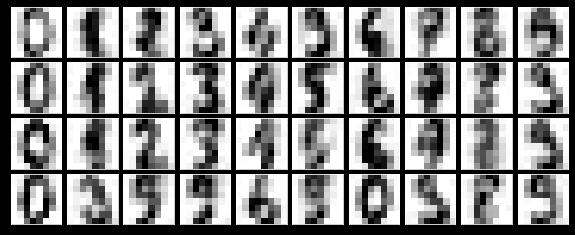

In [133]:
## TODO: denoise the noisy_digits via SVD truncation

np.random.seed(42)
noisy_digits = np.random.normal(X, 4)

r = 10

U, S, VT = np.linalg.svd(noisy_digits)

Sigma = np.diag(S)

denoised_digits = U[:,:r] @ Sigma[:r, :r] @ VT[:r, :] 

plot_digits(denoised_digits)